The dataset is significantly imbalanced with respect to class labels. In this notebook, samples from the majority classes were used to generate new instances for the minority classes in order to mitigate this imbalance.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [2]:
df_train_readout = pd.read_csv('selected_and_filled_train_operational_readouts.csv')
df_train_labels = pd.read_csv('processed_train_labels.csv')

In [3]:
def visualization_distribution_pie_chart(dataframe, column):
    column_distribution = dataframe[column].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        column_distribution,
        labels=column_distribution.index,
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct * column_distribution.sum() / 100)})",
        startangle=90,
        colors=['blue', 'red'],
        textprops={'color': 'white'}
    )
    
    plt.title("Distribution of " + column)
    
    distribution_text = "\n".join([f"{label}: {count} ({(count / column_distribution.sum() * 100):.1f}%)"
                                   for label, count in column_distribution.items()])
    plt.figtext(0.5, -0.1, distribution_text, ha="center", fontsize=10, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})
    
    plt.show()

In [4]:
# Initialize new_vehicle_id starting from 33700
new_vehicle_id = 33700

# Function to create new rows for the given conditions
def generate_new_rows_updated(base_df, label_df, base_class_label, new_class_label, subtract_value):
    global new_vehicle_id
    new_rows = []
    new_labels = []
    
    filtered_labels = label_df[label_df['class_labels'] == base_class_label]
    
    for _, row in filtered_labels.iterrows():
        vehicle_id = row['vehicle_id']
        max_time_step = row['length_of_study_time_step'] - subtract_value
        
        matching_rows = base_df[(base_df['vehicle_id'] == vehicle_id) & (base_df['time_step'] <= max_time_step)]
        
        for _, match_row in matching_rows.iterrows():
            new_row = match_row.copy()
            new_row['vehicle_id'] = new_vehicle_id
            new_rows.append(new_row)
        
        # Add new label for this vehicle_id
        if not matching_rows.empty:
            new_label_row = {
                'vehicle_id': new_vehicle_id,
                'length_of_study_time_step': row['length_of_study_time_step'],
                'in_study_repair': row['in_study_repair'],
                'class_labels': new_class_label
            }
            new_labels.append(new_label_row)
            new_vehicle_id += 1
    
    new_rows_df = pd.DataFrame(new_rows)
    updated_readout_df = pd.concat([base_df, new_rows_df], ignore_index=True)
    new_labels_df = pd.DataFrame(new_labels)
    updated_label_df = pd.concat([label_df, new_labels_df], ignore_index=True)
    
    return updated_readout_df, updated_label_df


In [5]:
processed_train_readout, processed_train_labels = generate_new_rows_updated(
    df_train_readout, df_train_labels, base_class_label=4, new_class_label=3, subtract_value=6
)

In [37]:
processed_train_readout.tail(200)

vehicle_id  time_step      171_0     666_0     837_0   167_0       167_1       167_2       167_3        167_4       167_6      167_7     167_8    167_9    309_0        272_2        272_3      272_5    272_6  272_7  272_8  272_9      370_0     291_0    291_3    291_4    291_5       158_0      158_9       100_0         459_0        459_1        459_2        459_13        459_14         459_15        459_16     459_17     459_18    459_19       397_0      397_3     397_4     397_5  \
1200352       40086      150.0  5600820.0  105919.0   19116.0     0.0   7388897.0  17844804.0   9744367.0   22047651.0  20755892.0  1651551.0  192874.0  45534.0    646.0    5323247.0    9628244.0  2579347.0  61928.0    0.0    0.0    0.0        0.0   10507.0  10524.0   3422.0   2237.0  10774876.0   595755.0  14450320.0   2705.175389   661.317167   745.826639   8573.521389  15870.266944   89162.496417  53758.484667   2.119639   0.209778  0.144250   8439438.0   284128.0  201778.0  137165.0   
1200353       40086      156.0  5739885.0  108292.0   19268.0     0.0   7790132.0  18562765.0  10024522.0   22854486.0  20900237.0  1652736.0  192874.0  45534.0    646.0    5483433.0    9972602.0  2586445.0  61928.0    0.0    0.0    0.0        0.0   10886.0  10923.0   3521.0   2283.0  11075381.0   619443.0  14945905.0   2810.384278   683.755778   766.796194   8771.303806  16325.169056   91450.415028  55063.262694   2.119694   0.209778  0.144250   8683607.0   288253.0  204703.0  137590.0   
1200354       40086      162.2  5976285.0  112997.0   19924.0     0.0   8142062.0  19358531.0  10467907.0   23966002.0  21606527.0  1699897.0  193219.0  45534.0    646.0    5706566.0   10502417.0  2637210.0  61929.0    0.0    0.0    0.0        0.0   11442.0  11370.0   3656.0   2382.0  11602289.0   642400.0  15620340.0   2955.542417   711.945306   796.851333   9067.517278  16834.929250   95622.598389  57636.582278   2.136056   0.213278  0.144250   9028657.0   296285.0  209355.0  141454.0   
1200355       40086      167.0  6200430.0  117176.0   20316.0     0.0   8444852.0  19834587.0  10741927.0   24692092.0  22102427.0  1777102.0  193219.0  45535.0    646.0    5868728.0   10797712.0  2699428.0  61929.0    0.0    0.0    0.0        0.0   11757.0  11673.0   3762.0   2469.0  12034829.0   664217.0  16025670.0   3038.027333   732.593667   822.644944   9353.515000  17351.225528   99356.183611  59981.255917   2.169833   0.224667  0.144250   9244049.0   306401.0  213647.0  146090.0   
1200356       40086      167.8  6237375.0  117904.0   20364.0     0.0   8499452.0  20013057.0  10774807.0   24869512.0  22173422.0  1782112.0  193219.0  45535.0    646.0    5884601.0   10847268.0  2702990.0  61929.0    0.0    0.0    0.0        0.0   11835.0  11749.0   3775.0   2478.0  12115578.0   670385.0  16139485.0   3059.732806   736.612361   827.492167   9394.779556  17417.665972  100022.443306  60425.426194   2.175583   0.224667  0.144250   9308415.0   315241.0  214840.0  146130.0   
1200357       40086      170.8  6338190.0  120732.0   20652.0     0.0   8713172.0  20267172.0  10943107.0   25334932.0  22352072.0  1801552.0  194854.0  45535.0    647.0    5969479.0   10991464.0  2748464.0  61930.0    0.0    0.0    0.0        0.0   12024.0  11995.0   3883.0   2550.0  12305598.0   677633.0  16362625.0   3105.510750   750.707833   844.622778   9562.880583  17715.661528  101635.441639  61391.916194   2.177250   0.228444  0.144250   9416856.0   319801.0  217836.0  148422.0   
1200358       40086      176.8  6613905.0  126528.0   21477.0     0.0   9045722.0  20752482.0  11299192.0   26530522.0  22807457.0  1841827.0  194855.0  45535.0    661.0    6122087.0   11351720.0  2805170.0  61930.0    0.0    0.0    0.0        0.0   12414.0  12418.0   3988.0   2647.0  12834546.0   691805.0  16801740.0   3188.175917   775.616667   871.069083   9935.069583  18370.898750  106172.942500  64403.898917   2.201639   0.228444  0.144250   9671548.0   330534.0  224792.0  150678.0   
1200359       40087        0.0     1395.0       0

In [38]:
processed_train_readout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200552 entries, 0 to 1200551
Data columns (total 63 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   vehicle_id  1200552 non-null  int64  
 1   time_step   1200552 non-null  float64
 2   171_0       1200552 non-null  float64
 3   666_0       1200552 non-null  float64
 4   837_0       1200552 non-null  float64
 5   167_0       1200552 non-null  float64
 6   167_1       1200552 non-null  float64
 7   167_2       1200552 non-null  float64
 8   167_3       1200552 non-null  float64
 9   167_4       1200552 non-null  float64
 10  167_6       1200552 non-null  float64
 11  167_7       1200552 non-null  float64
 12  167_8       1200552 non-null  float64
 13  167_9       1200552 non-null  float64
 14  309_0       1200552 non-null  float64
 15  272_2       1200552 non-null  float64
 16  272_3       1200552 non-null  float64
 17  272_5       1200552 non-null  float64
 18  272_6       1200552 no

In [34]:
processed_train_readout['vehicle_id'] = processed_train_readout['vehicle_id'].astype('int64')

In [35]:
processed_train_readout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200552 entries, 0 to 1200551
Data columns (total 63 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   vehicle_id  1200552 non-null  int64  
 1   time_step   1200552 non-null  float64
 2   171_0       1200552 non-null  float64
 3   666_0       1200552 non-null  float64
 4   837_0       1200552 non-null  float64
 5   167_0       1200552 non-null  float64
 6   167_1       1200552 non-null  float64
 7   167_2       1200552 non-null  float64
 8   167_3       1200552 non-null  float64
 9   167_4       1200552 non-null  float64
 10  167_6       1200552 non-null  float64
 11  167_7       1200552 non-null  float64
 12  167_8       1200552 non-null  float64
 13  167_9       1200552 non-null  float64
 14  309_0       1200552 non-null  float64
 15  272_2       1200552 non-null  float64
 16  272_3       1200552 non-null  float64
 17  272_5       1200552 non-null  float64
 18  272_6       1200552 no

In [32]:
processed_train_labels

vehicle_id  length_of_study_time_step  in_study_repair  class_labels
0               0                      510.0              0.0             0
1               2                      281.8              0.0             0
2               3                      293.4              0.0             0
3               4                      210.0              0.0             0
4               5                      360.4              0.0             0
5               8                      288.6              0.0             0
6              13                      155.4              0.0             0
7              14                      433.6              0.0             0
8              15                      291.2              0.0             0
9              17                      436.8              0.0             0
10             22                      190.8              1.0             4
11             25                      320.2              0.0             0
12             26                      281.4              0.0             0
13             27                      354.6              1.0             4
14             28                      239.4              0.0             0
15             29                      425.2              1.0             4
16             30                      496.6              0.0             0
17             31                      487.8              0.0             0
18             32                      152.6              0.0             0
19             33                      501.2              0.0             0
20             35                      167.2              0.0             0
21             36                      484.4              0.0             0
22             37                      460.8              0.0             0
23             38                      479.6              0.0             0
24             39                      436.8              0.0             0
25             40                      428.4              0.0             0
26             41                      151.6              0.0             0
27             42                      482.2              0.0             0
28             43                      285.4              0.0             0
29             44                      157.2              0.0             0
30             47                      153.0              0.0             0
31             48                      154.4              0.0             0
32             49                      504.2              0.0             0
33             50                      504.6              0.0             0
34             52                      235.0              1.0             4
35             53                      128.2              0.0             0
36             54                      393.6              0.0             0
37             55                      167.4              0.0             0
38             56                      396.2              0.0             0
39             57                      436.2              0.0             0
40             61                      293.0              1.0             4
41             63                      174.6              0.0             0
42             64                      142.6              0.0             0
43             65                      449.4              0.0             0
44             67                      330.8              1.0             4
45             68                      509.6              0.0             0
46             69                      215.8              0.0             0
47             70                      467.6              0.0             0
48             71                      491.6              0.0             0
49             72                      141.2              0.0             0
50             73                      407.6              0.0             0
51             75                      285.0           

In [41]:
processed_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29942 entries, 0 to 29941
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vehicle_id                 29942 non-null  int64  
 1   length_of_study_time_step  29942 non-null  float64
 2   in_study_repair            29942 non-null  int64  
 3   class_labels               29942 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 935.8 KB


In [40]:
processed_train_labels['in_study_repair'] = processed_train_labels['in_study_repair'].astype('int64')

In [29]:
processed_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27711 entries, 0 to 27710
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vehicle_id                 27711 non-null  int64  
 1   length_of_study_time_step  27711 non-null  float64
 2   in_study_repair            27711 non-null  int64  
 3   class_labels               27711 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 866.1 KB


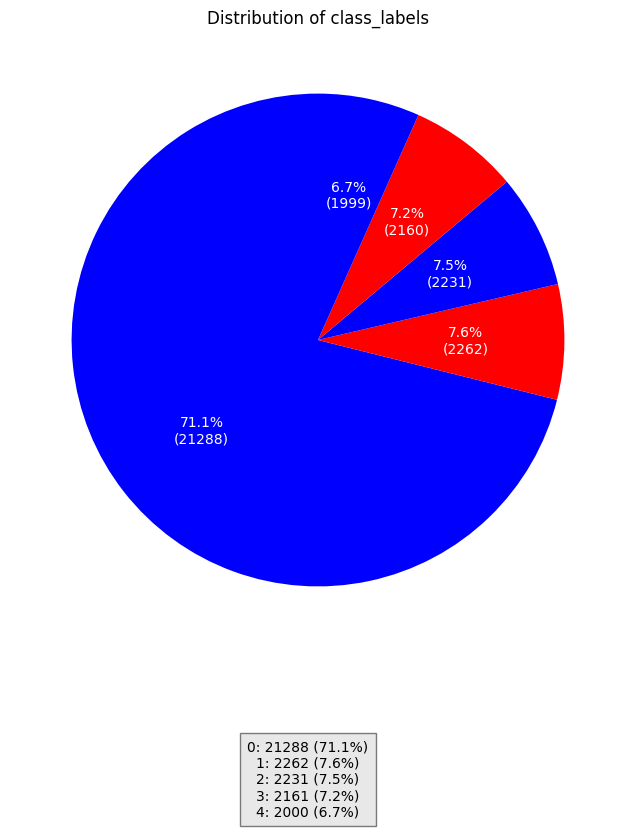

In [42]:
visualization_distribution_pie_chart(processed_train_labels, 'class_labels')

In [22]:
processed_train_readout, processed_train_labels = generate_new_rows_updated(
    processed_train_readout, processed_train_labels, base_class_label=3, new_class_label=2, subtract_value=12
)

In [31]:
processed_train_readout, processed_train_labels = generate_new_rows_updated(
    processed_train_readout, processed_train_labels, base_class_label=2, new_class_label=1, subtract_value=24
)

In [43]:
processed_train_readout.to_csv('labels_increased_and_selected_and_filled_train_operational_readouts.csv', index=False)
print("Başarılı")

Başarılı


In [44]:
processed_train_labels.to_csv('labels_increased_and_selected_and_filled_train_labels.csv', index=False)
print("Başarılı")

Başarılı


In [45]:
processed_train_readout.tail()

vehicle_id  time_step      171_0    666_0    837_0  167_0      167_1       167_2       167_3        167_4      167_6   167_7  167_8  167_9   309_0        272_2        272_3    272_5  272_6  272_7  272_8  272_9      370_0     291_0    291_3    291_4    291_5     158_0     158_9       100_0         459_0        459_1        459_2       459_13       459_14        459_15     459_16    459_17    459_18    459_19       397_0     397_3     397_4  397_5      397_6      397_7      397_8  \
1200547       40091      251.6  2202075.0  70757.0  34223.0    0.0  6869134.0  22368274.0  91544704.0  189972875.0  1187703.0   513.0    0.0    0.0  4680.0   91143357.0  236135359.0  16815.0    0.0    0.0    0.0    0.0  5648790.0  142677.0  87780.0  29826.0  25715.0  608212.0  842573.0  70694773.0  11352.613833  6096.190750  4138.035556  5509.718667  6917.927667  16824.759917  11.306000  0.337306  0.115472  0.094722  53303428.0  565220.0  180673.0  597.0  7017852.0  6742199.0  4926258.0   
1200548       40091      252.0  2205630.0  70918.0  34287.0    0.0  6874174.0  22389814.0  91743290.0  190261295.0  1187703.0   513.0    0.0    0.0  4694.0   91495878.0  236348845.0  16815.0    0.0    0.0    0.0    0.0  5656224.0  142920.0  87933.0  29857.0  25781.0  609736.0  843462.0  70820358.0  11388.448028  6105.000972  4144.890194  5517.143056  6928.888194  16846.249528  11.319806  0.337306  0.115472  0.094722  53384878.0  566383.0  182166.0  597.0  7033741.0  6756319.0  4933471.0   
1200549       40091      253.2  2217015.0  70989.0  34351.0    0.0  6929584.0  22568224.0  92293340.0  191164100.0  1187703.0   513.0    0.0    0.0  4694.0   92546772.0  236764247.0  16815.0    0.0    0.0    0.0    0.0  5676393.0  142920.0  87933.0  29857.0  25781.0  613193.0  844170.0  71137868.0  11388.448028  6105.000972  4144.890194  5517.143056  6928.888194  16846.249528  11.319806  0.337306  0.115472  0.094722  53613950.0  568962.0  184394.0  598.0  7062558.0  6790588.0  4958716.0   
1200550       40091      265.4  2340495.0  73824.0  36215.0    0.0  7375039.0  24417380.0  98899836.0  200122655.0  1198024.0  2928.0    0.0    0.0  5058.0  105994077.0  240522274.0  18908.0    0.0    0.0    0.0    0.0  5985462.0  152680.0  94050.0  32134.0  27338.0  669605.0  891246.0  74844803.0  12054.471889  6519.594972  4449.262889  5926.670389  7570.848917  18042.535056  12.166972  0.349750  0.115472  0.094722  56449158.0  610558.0  204386.0  711.0  7366055.0  7091736.0  5250101.0   
1200551       40091      267.0  2350800.0  74090.0  36319.0    0.0  7375969.0  24418880.0  98910936.0  200144286.0  1198024.0  2928.0    0.0    0.0  5114.0  107533706.0  240808899.0  18908.0    0.0    0.0    0.0    0.0  6017124.0  153919.0  94495.0  32386.0  27500.0  675185.0  892254.0  75247768.0  12116.512611  6563.372861  4478.210361  5948.614222  7599.949833  18100.995694  12.185694  0.349750  0.115472  0.094722  56757475.0  614238.0  205236.0  711.0  7398380.0  7124669.0  5271597.0   

            397_9    397_10  397_11     397_12    397_15  397_17    397_18   397_22  397_23    397_24     397_25    397_27   397_30    397_31   397_34  397_35  
1200547  464411.0  196015.0  1828.0  1785083.0  273457.0  2467.0  576158.0  38577.0  2106.0  227922.0   956119.0  173495.0  45169.0  120108.0  21048.0   615.0  
1200548  465247.0  199607.0  1828.0  1787271.0  274002.0  2471.0  577302.0  38679.0  2111.0  228314.0   957819.0  173763.0  45225.0  120245.0  21108.0   615.0  
1200549  467227.0  207887.0  1828.0  1793632.0  275174.0  2471.0  579775.0  38768.0  2111.0  228950.0   961252.0  173903.0  45286.0  120430.0  21108.0   616.0  
1200550  499672.0  219759.0  1932.0  1879592.0  294395.0  2605.0  612997.0  40864.0  2221.0  242218.0  1003850.0  180671.0  47779.0  124638.0  21541.0   629.0  
1200551  502829.0  220692.0  1940.0  1888912.0  296663.0  2633.0  616242.0  41172.0  2225.0  243394.0  1007446.0  181203.0  47927.0  124854.0  21622.0   633.0

In [46]:
processed_train_labels.tail()

vehicle_id  length_of_study_time_step  in_study_repair  class_labels
29937       40087                      322.6                1             1
29938       40088                      186.6                1             1
29939       40089                      192.6                1             1
29940       40090                      203.8                1             1
29941       40091                      299.8                1             1